# Prosper Loan Dataset
## by Ahmed Khalifa

## Preliminary Wrangling

> The Prosper loan dataset contains data regarding loans provided by Prosper.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> The motivation for this exploration is to identify how various factors affect whether a loan is repaid or not.

In [2]:
loans = pd.read_csv('prosperLoanData.csv')
loans.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
#Choosing the columns to keep and study
loans = loans[['Term', 'LoanStatus', 'BorrowerRate', 'ListingCategory (numeric)', 'EmploymentStatus', 
               'IsBorrowerHomeowner','CreditScoreRangeLower','CreditScoreRangeUpper', 'IncomeRange', 'IncomeVerifiable', 
               'StatedMonthlyIncome']]

In [5]:
loans.rename({'ListingCategory (numeric)' : 'ListingCategory'}, axis = 1, 
             inplace = True)

In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Term                   113937 non-null  int64  
 1   LoanStatus             113937 non-null  object 
 2   BorrowerRate           113937 non-null  float64
 3   ListingCategory        113937 non-null  int64  
 4   EmploymentStatus       111682 non-null  object 
 5   IsBorrowerHomeowner    113937 non-null  bool   
 6   CreditScoreRangeLower  113346 non-null  float64
 7   CreditScoreRangeUpper  113346 non-null  float64
 8   IncomeRange            113937 non-null  object 
 9   IncomeVerifiable       113937 non-null  bool   
 10  StatedMonthlyIncome    113937 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 8.0+ MB


In [7]:
loans.dropna(inplace = True)

In [8]:
loans.LoanStatus.unique(), loans.EmploymentStatus.unique(), loans.IncomeRange.unique()

(array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
        'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
        'Past Due (31-60 days)', 'Past Due (91-120 days)',
        'FinalPaymentInProgress', 'Past Due (>120 days)', 'Cancelled'],
       dtype=object),
 array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
        'Not employed', 'Part-time', 'Retired'], dtype=object),
 array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
        '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object))

In [9]:
loans = loans.query('LoanStatus == "Completed" or LoanStatus ==  "Defaulted" or LoanStatus ==  "Cancelled"')

### What is the structure of your dataset?

> It's a massive dataset consisiting of 113937 entries and 81 columns of various aspects about loans.
Lisintg Categories are identified as following: The category of the listing that the borrower selected when posting their 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

### What is/are the main feature(s) of interest in your dataset?

> I believe the main feature is Loan status for finished loans (whether the loan was paid or not)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the main features that will help are Term, borrower rate, listing category, employment status, whether the borrower is a homeowner or not, credit score range, income range, whether income is verifiable or not and stated monthly income.

## Univariate Exploration

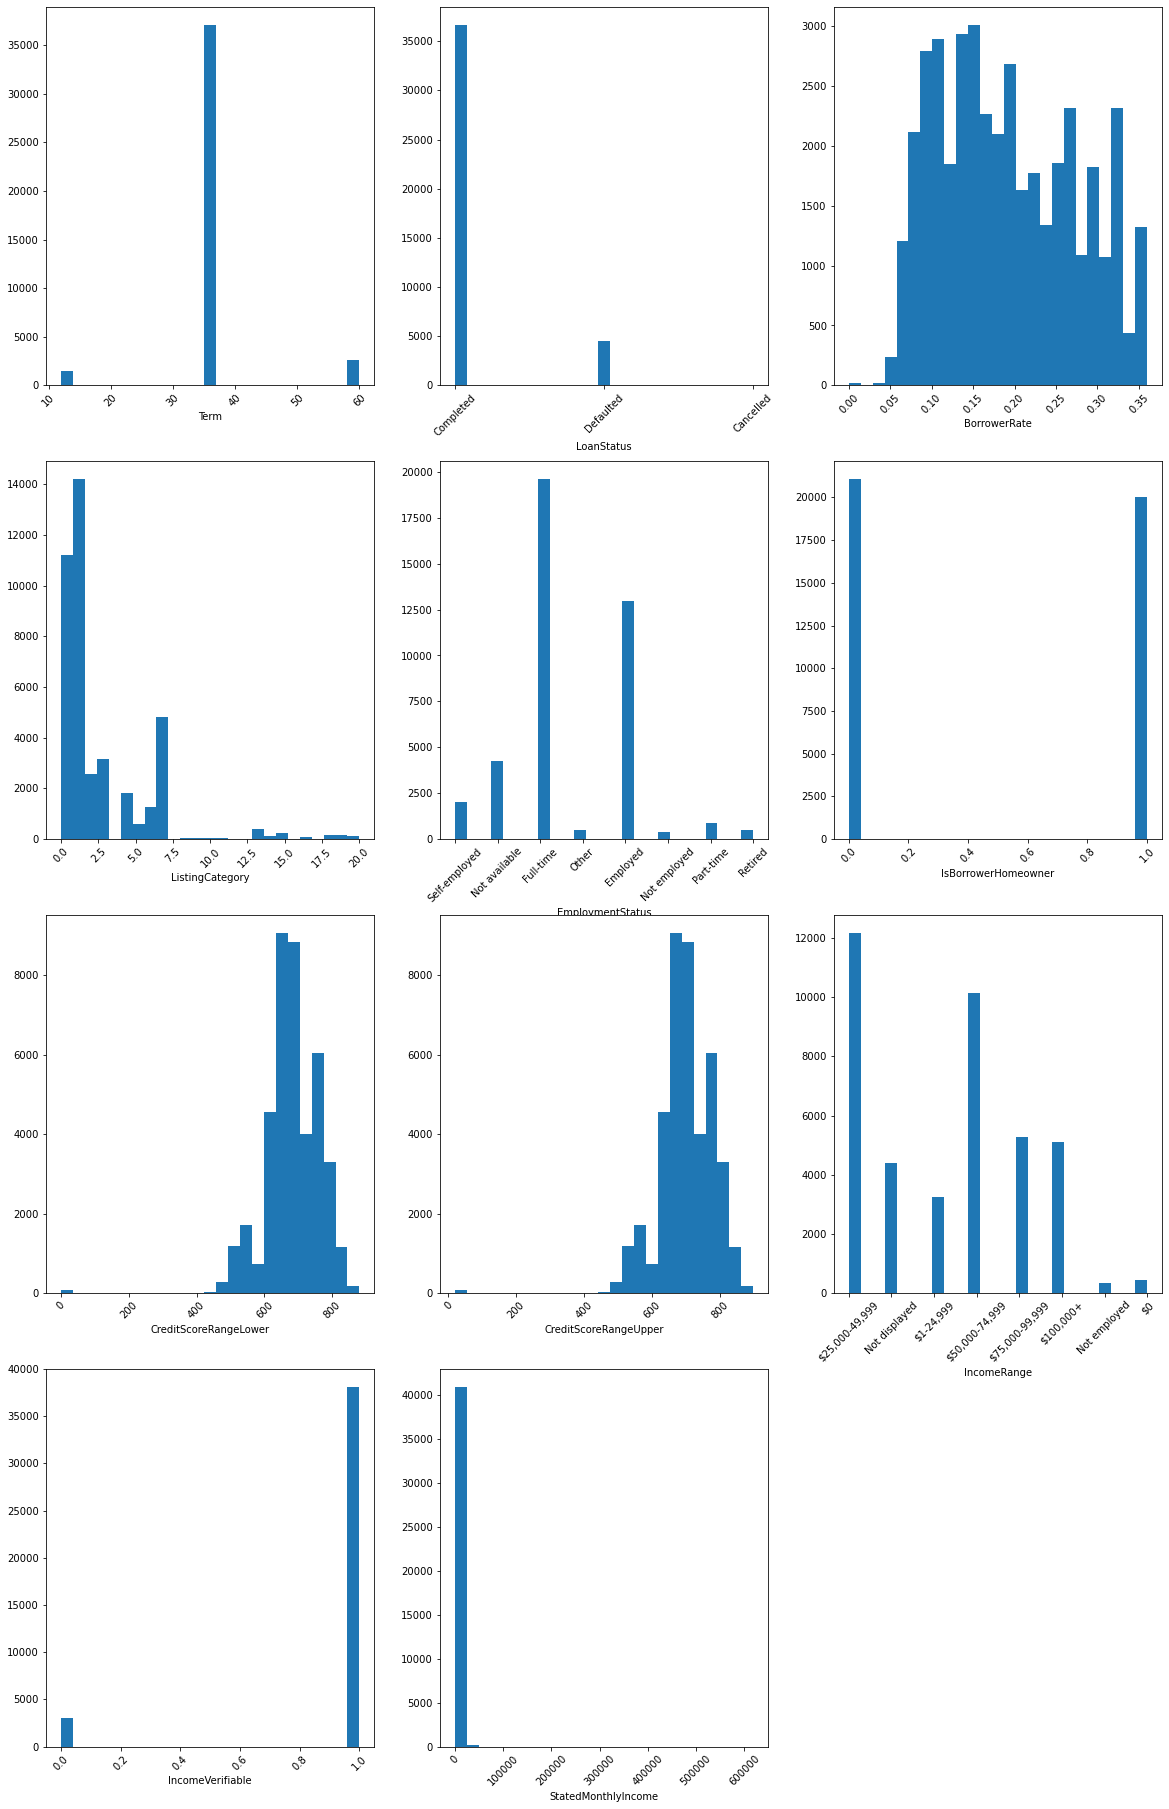

In [10]:
columns = ['Term', 'LoanStatus', 'BorrowerRate', 'ListingCategory', 'EmploymentStatus', 'IsBorrowerHomeowner',
           'CreditScoreRangeLower','CreditScoreRangeUpper', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome']
plotnumber = 1;
loans['IsBorrowerHomeowner'] = loans['IsBorrowerHomeowner'].astype(int)
loans['IncomeVerifiable'] = loans['IncomeVerifiable'].astype(int)
plt.figure(figsize = [20, 32])
for column in columns:
    plt.subplot(4,3,plotnumber)
    plt.hist(data = loans, x = column, bins = 25);
    plt.xticks(rotation = 45)
    plt.xlabel(column)
    plotnumber += 1

An overall look at all the distribution of all the variables. We can notice that there are some outliers in stated monthly income and credit score range. We need to further ivestigate the outliers in stated monthly income. We can also use mean credit score rather than range after investigating the zero values.
We also can notice that there are almost no cancelled loans, so we can drop their entries.
We can also observe that there are some categorical variables that need to be converted to categorical type.

In [11]:
sns.boxplot(data = loans, x = 'StatedMonthlyIncome')

<AxesSubplot:xlabel='StatedMonthlyIncome'>

In [12]:
loans[loans['StatedMonthlyIncome'] > 100000]

Term LoanStatus  BorrowerRate  ListingCategory EmploymentStatus  \
8066      36  Completed        0.3199                1         Employed   
17411     36  Completed        0.3199                1         Employed   
35218     36  Completed        0.0705                3        Full-time   
53014     12  Completed        0.1795                3    Self-employed   
56867     36  Completed        0.1045                0    Self-employed   
63925     36  Completed        0.2500                0    Not available   
83697     36  Completed        0.0800                0    Not available   
111265    60  Completed        0.1819                1         Employed   

        IsBorrowerHomeowner  CreditScoreRangeLower  CreditScoreRangeUpper  \
8066                      1                  660.0                  679.0   
17411                     1                  660.0                  679.0   
35218                     1                  860.0                  879.0   
53014                     1                  720.0                  739.0   
56867                     1                  820.0                  839.0   
63925                     1                  560.0                  579.0   
83697                     1                  840.0                  859.0   
111265                    0                  640.0                  659.0   

          IncomeRange  IncomeVerifiable  StatedMonthlyIncome  
8066        $100,000+                 1        416666.666667  
17411       $100,000+                 1        483333.333333  
35218       $100,000+                 0        108333.333333  
53014       $100,000+                 0        618547.833333  
56867       $100,000+                 1        185081.750000  
63925   Not displayed                 1        140416.666667  
83697   Not displayed                 1        185081.750000  
111265      $100,000+                 1        108750.000000

It seems that there are no abonrmalities in thos values. They have a relatively high credit score, a high income range, completed their loans and most of them have verifiable income.

In [13]:
loans[loans['CreditScoreRangeLower'] < 200]

Term LoanStatus  BorrowerRate  ListingCategory EmploymentStatus  \
794       36  Completed        0.2900                0    Not available   
912       36  Defaulted        0.2600                0    Not available   
4371      36  Defaulted        0.2325                0    Not available   
4430      36  Defaulted        0.1450                0    Not available   
5684      36  Completed        0.2300                0    Not available   
...      ...        ...           ...              ...              ...   
109060    36  Defaulted        0.2500                0    Not available   
109468    36  Completed        0.1200                0    Not available   
109855    36  Completed        0.2190                0    Not available   
111624    36  Defaulted        0.2900                0    Not available   
113848    36  Completed        0.2875                0    Not available   

        IsBorrowerHomeowner  CreditScoreRangeLower  CreditScoreRangeUpper  \
794                       0                    0.0                   19.0   
912                       0                    0.0                   19.0   
4371                      0                    0.0                   19.0   
4430                      0                    0.0                   19.0   
5684                      0                    0.0                   19.0   
...                     ...                    ...                    ...   
109060                    0                    0.0                   19.0   
109468                    0                    0.0                   19.0   
109855                    0                    0.0                   19.0   
111624                    0                    0.0                   19.0   
113848                    0                    0.0                   19.0   

          IncomeRange  IncomeVerifiable  StatedMonthlyIncome  
794     Not displayed                 1           115.583333  
912     Not displayed                 1          2316.666667  
4371    Not displayed                 0             0.000000  
4430    Not displayed                 1           166.666667  
5684    Not displayed                 1          1083.333333  
...               ...               ...                  ...  
109060  Not displayed                 1           500.000000  
109468  Not displayed                 0             0.083333  
109855  Not displayed                 1          2000.000000  
111624  Not displayed                 1          2333.333333  
113848  Not displayed                 1           833.333333  

[72 rows x 11 columns]

In [14]:
loans[loans['CreditScoreRangeUpper'] < 200]

Term LoanStatus  BorrowerRate  ListingCategory EmploymentStatus  \
794       36  Completed        0.2900                0    Not available   
912       36  Defaulted        0.2600                0    Not available   
4371      36  Defaulted        0.2325                0    Not available   
4430      36  Defaulted        0.1450                0    Not available   
5684      36  Completed        0.2300                0    Not available   
...      ...        ...           ...              ...              ...   
109060    36  Defaulted        0.2500                0    Not available   
109468    36  Completed        0.1200                0    Not available   
109855    36  Completed        0.2190                0    Not available   
111624    36  Defaulted        0.2900                0    Not available   
113848    36  Completed        0.2875                0    Not available   

        IsBorrowerHomeowner  CreditScoreRangeLower  CreditScoreRangeUpper  \
794                       0                    0.0                   19.0   
912                       0                    0.0                   19.0   
4371                      0                    0.0                   19.0   
4430                      0                    0.0                   19.0   
5684                      0                    0.0                   19.0   
...                     ...                    ...                    ...   
109060                    0                    0.0                   19.0   
109468                    0                    0.0                   19.0   
109855                    0                    0.0                   19.0   
111624                    0                    0.0                   19.0   
113848                    0                    0.0                   19.0   

          IncomeRange  IncomeVerifiable  StatedMonthlyIncome  
794     Not displayed                 1           115.583333  
912     Not displayed                 1          2316.666667  
4371    Not displayed                 0             0.000000  
4430    Not displayed                 1           166.666667  
5684    Not displayed                 1          1083.333333  
...               ...               ...                  ...  
109060  Not displayed                 1           500.000000  
109468  Not displayed                 0             0.083333  
109855  Not displayed                 1          2000.000000  
111624  Not displayed                 1          2333.333333  
113848  Not displayed                 1           833.333333  

[72 rows x 11 columns]

In [15]:
loans['MeanCreditScore'] = (loans['CreditScoreRangeLower'] + loans['CreditScoreRangeUpper'])/2

In [16]:
loans.drop(['CreditScoreRangeLower', 'CreditScoreRangeUpper'], axis = 1, inplace = True)

In [17]:
sns.boxplot(data = loans, x = 'MeanCreditScore')

<AxesSubplot:xlabel='MeanCreditScore'>

In [18]:
loans = loans[loans['MeanCreditScore'] > 200]

It seems from the boxplot that there were outliers (very low credit score), so they were dropped.

In [19]:
loans = loans.query('LoanStatus == "Completed" or LoanStatus == "Defaulted"')

In [20]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41057 entries, 0 to 113935
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Term                 41057 non-null  int64  
 1   LoanStatus           41057 non-null  object 
 2   BorrowerRate         41057 non-null  float64
 3   ListingCategory      41057 non-null  int64  
 4   EmploymentStatus     41057 non-null  object 
 5   IsBorrowerHomeowner  41057 non-null  int32  
 6   IncomeRange          41057 non-null  object 
 7   IncomeVerifiable     41057 non-null  int32  
 8   StatedMonthlyIncome  41057 non-null  float64
 9   MeanCreditScore      41057 non-null  float64
dtypes: float64(3), int32(2), int64(2), object(3)
memory usage: 3.1+ MB


In [21]:
loans['Term'].unique()

array([36, 60, 12], dtype=int64)

In [22]:
cat_term = pd.api.types.CategoricalDtype([12, 36, 60], ordered = True)
loans['Term'] = loans['Term'].astype(cat_term)

In [23]:
category_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal',
                 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure',
                 11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases',
                 15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding'}

In [24]:
loans.ListingCategory.replace(category_dict, inplace = True)
loans.ListingCategory.unique()

array(['Not Available', 'Household Expenses', 'Medical/Dental',
       'Debt Consolidation', 'Wedding', 'Other', 'Auto', 'Personal',
       'Business', 'Home Improvement', 'Taxes', 'Vacation', 'Motorcycle',
       'Engagement Ring', 'Student Use', 'Large Purchases',
       'Cosmetic Procedure', 'Boat', 'RV', 'Baby & Adoption',
       'Green Loans'], dtype=object)

In [25]:
loans.IncomeRange.unique()

array(['$25,000-49,999', 'Not displayed', '$1-24,999', '$50,000-74,999',
       '$75,000-99,999', '$100,000+', 'Not employed', '$0'], dtype=object)

In [26]:
cat_income = pd.api.types.CategoricalDtype(['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'], ordered = True)
loans['IncomeRange'] = loans['IncomeRange'].astype(cat_income)

In [27]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41057 entries, 0 to 113935
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Term                 41057 non-null  category
 1   LoanStatus           41057 non-null  object  
 2   BorrowerRate         41057 non-null  float64 
 3   ListingCategory      41057 non-null  object  
 4   EmploymentStatus     41057 non-null  object  
 5   IsBorrowerHomeowner  41057 non-null  int32   
 6   IncomeRange          41057 non-null  category
 7   IncomeVerifiable     41057 non-null  int32   
 8   StatedMonthlyIncome  41057 non-null  float64 
 9   MeanCreditScore      41057 non-null  float64 
dtypes: category(2), float64(3), int32(2), object(3)
memory usage: 2.6+ MB


## Re-exploring variables after modifications and adjustments

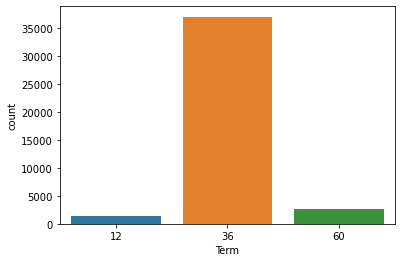

In [28]:
sns.countplot(data = loans, x = 'Term');

From the above plot, we can notice that the vast majority loans are 3 years long.

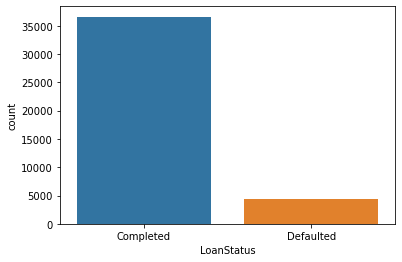

In [29]:
sns.countplot(data = loans, x = 'LoanStatus');

We can see that a large proportion of the loans are completed.

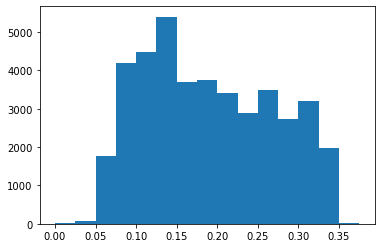

In [30]:
bins = np.arange(0, 0.4, 0.025)
plt.hist(data = loans, x = 'BorrowerRate', bins = bins);

We can see that loan rates have a uniform distribution along all values.

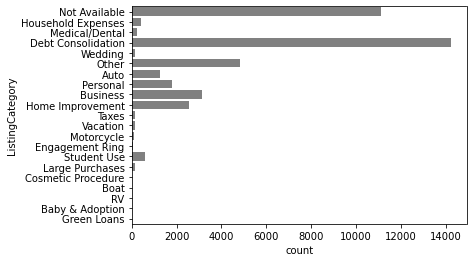

In [31]:
sns.countplot(data = loans, y = 'ListingCategory', color = 'grey');

We can notice from thsi graph that a large proportion of the loans is for debt consolidation.

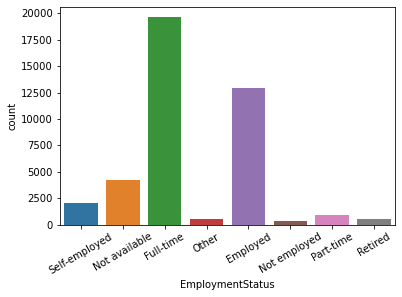

In [32]:
sns.countplot(data = loans, x = 'EmploymentStatus');
plt.xticks(rotation = 30);

We can see from this graph that most loanees are employed.

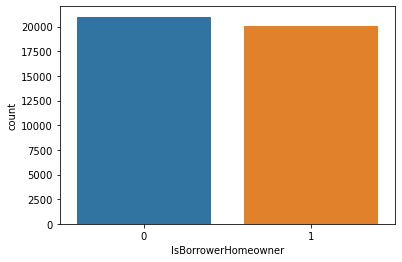

In [33]:
sns.countplot(data = loans, x = 'IsBorrowerHomeowner');

We can see that the proportions are equal here.

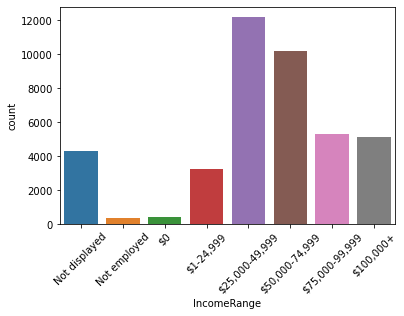

In [34]:
sns.countplot(data = loans, x = 'IncomeRange');
plt.xticks(rotation = 45);

We can see from the graph that most incomes fall between 25k and 75k.

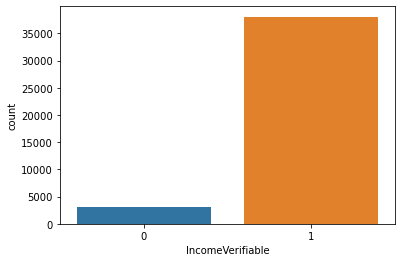

In [35]:
sns.countplot(data = loans, x = 'IncomeVerifiable');

We can see that a large portion of loanees have verifiable income sources.

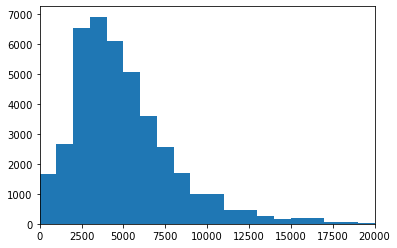

In [36]:
bins = np.arange(0, 600000, 1000)
plt.hist(data = loans, x = 'StatedMonthlyIncome', bins = bins);
plt.xlim(left = 0, right = 20000);

We can see from the histogram that most income fall between 2500 and 6000, which agrees with the results from Income Range.

In [37]:
loans.drop('StatedMonthlyIncome', axis = 1, inplace = True)

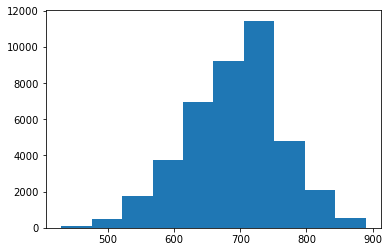

In [38]:
plt.hist(data = loans, x = 'MeanCreditScore');

We can see that credit scores are uniformly distributed, with mean, median and mode around 700.

## Bivariate Exploration

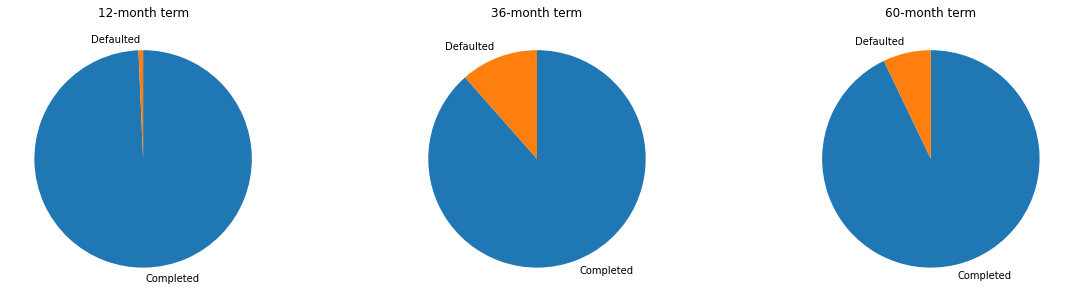

In [39]:
plt.figure(figsize = [20,5])

plt.subplot(1,3,1)
counts_12 = loans[loans['Term'] == 12].LoanStatus.value_counts()
plt.pie(counts_12, labels = counts_12.index, startangle = 90, counterclock = False);
plt.title('12-month term')

plt.subplot(1,3,2)
counts_36 = loans[loans['Term'] == 36].LoanStatus.value_counts()
plt.pie(counts_36, labels = counts_36.index, startangle = 90, counterclock = False);
plt.title('36-month term')

plt.subplot(1,3,3)
counts_60 = loans[loans['Term'] == 60].LoanStatus.value_counts()
plt.pie(counts_60, labels = counts_60.index, startangle = 90, counterclock = False);
plt.title('60-month term');

As we can see from the pie charts above, most 12-month loans were completed , while a significant portion of 36-month loans weren't completed.

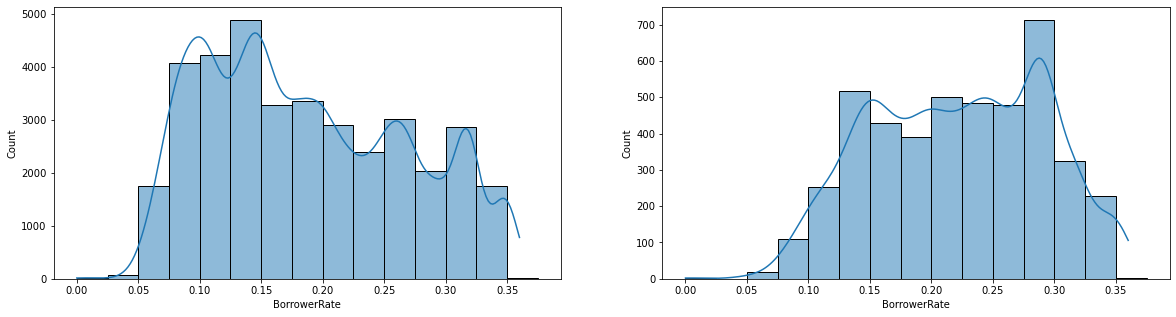

In [40]:
plt.figure(figsize = [20,5])
bins = np.arange(0, 0.4, 0.025)
plt.subplot(1,2,1)
sns.histplot(data = loans[loans['LoanStatus'] == 'Completed'], x = 'BorrowerRate', bins = bins, kde = True)
plt.subplot(1,2,2)
sns.histplot(data = loans[loans['LoanStatus'] == 'Defaulted'], x = 'BorrowerRate', bins = bins, kde = True);

From the above plots and their Kernel Density Estimation curve, we can notice that defaulted loans tend to have a higher interest rate.

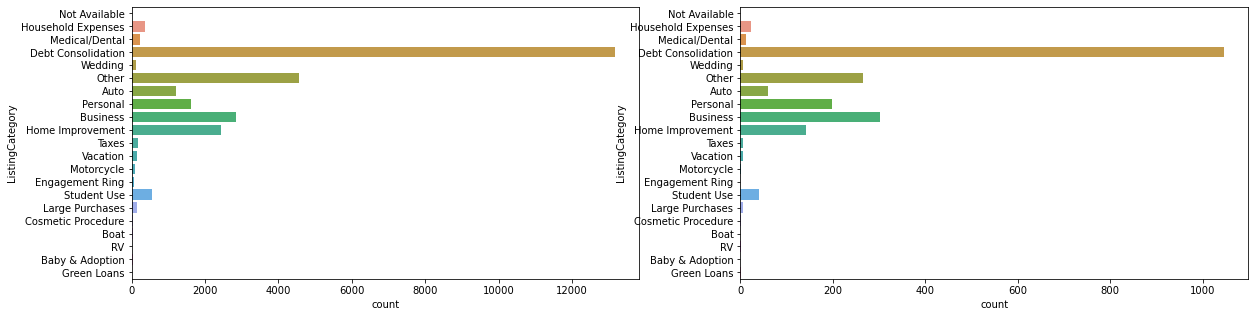

In [41]:
order = loans.ListingCategory.unique()
plt.figure(figsize = [20,5])
plt.subplot(1,2,1)
sns.countplot(data = loans.query('LoanStatus == "Completed" and ListingCategory != "Not Available"'), y = 'ListingCategory', order = order);
plt.subplot(1,2,2)
sns.countplot(data = loans.query('LoanStatus == "Defaulted" and ListingCategory != "Not Available"'), y = 'ListingCategory', order = order);

We can notice from those graphs that the disribution is quite similar, so we can drop this column to ease further investigation.

In [42]:
loans.drop('ListingCategory', axis = 1, inplace = True)

<AxesSubplot:xlabel='LoanStatus', ylabel='count'>

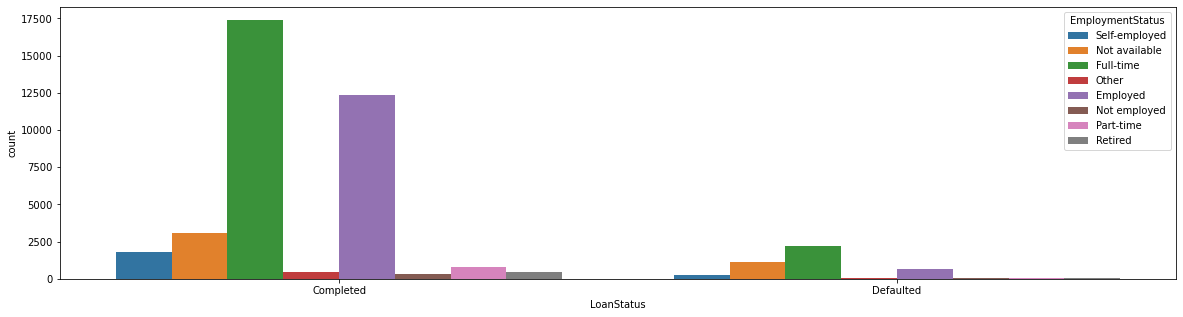

In [43]:
plt.figure(figsize = [20,5])
sns.countplot(data = loans, x = 'LoanStatus', hue = 'EmploymentStatus')

As we can notice from the above graph the distributions seem quite similar, which leads us to belive that employment status is not a major factor.

In [44]:
loans.drop('EmploymentStatus', axis = 1, inplace = True)

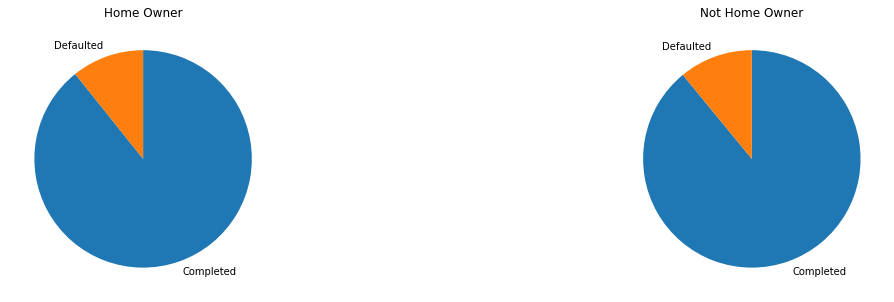

In [45]:
plt.figure(figsize = [20,5])

plt.subplot(1,2,1)
counts_1 = loans[loans['IsBorrowerHomeowner'] == 1].LoanStatus.value_counts()
plt.pie(counts_1, labels = counts_1.index, startangle = 90, counterclock = False);
plt.title('Home Owner')

plt.subplot(1,2,2)
counts_0 = loans[loans['IsBorrowerHomeowner'] == 0].LoanStatus.value_counts()
plt.pie(counts_0, labels = counts_0.index, startangle = 90, counterclock = False);
plt.title('Not Home Owner');


We can seee from tha charts above that this factor alos, like the previous 2, doesn't contribute much to our investigation.

In [46]:
loans.drop('IsBorrowerHomeowner', axis = 1, inplace = True)

<AxesSubplot:xlabel='IncomeRange', ylabel='count'>

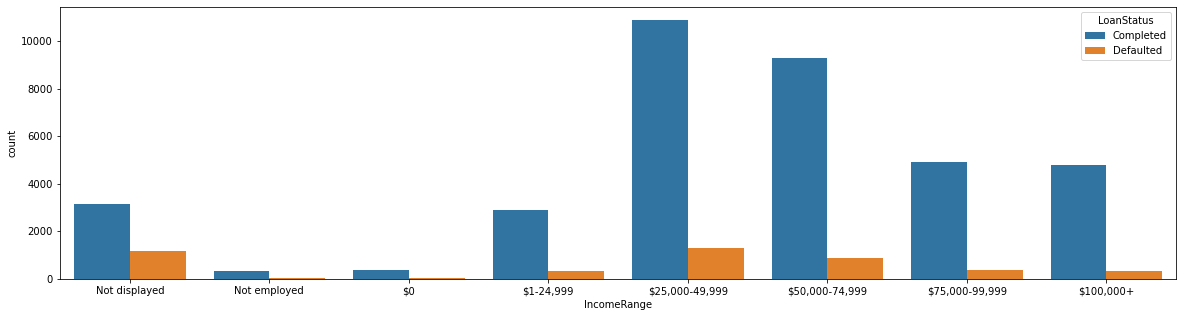

In [47]:
plt.figure(figsize = [20,5])
sns.countplot(data = loans, x = 'IncomeRange', hue = 'LoanStatus')

The above graph leads us to believe that Income Range might not be a contributing factor also.

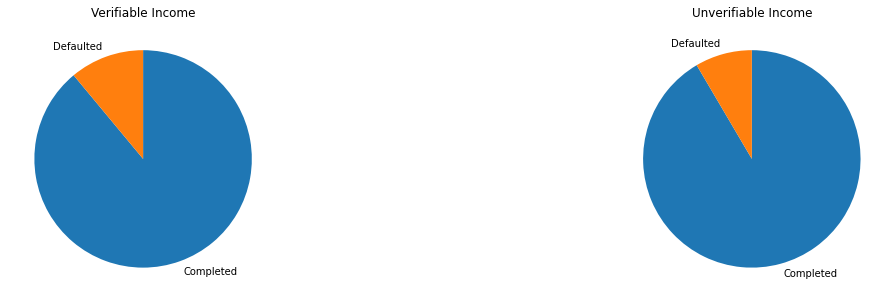

In [48]:
plt.figure(figsize = [20,5])

plt.subplot(1,2,1)
counts_1 = loans[loans['IncomeVerifiable'] == 1].LoanStatus.value_counts()
plt.pie(counts_1, labels = counts_1.index, startangle = 90, counterclock = False);
plt.title('Verifiable Income')

plt.subplot(1,2,2)
counts_0 = loans[loans['IncomeVerifiable'] == 0].LoanStatus.value_counts()
plt.pie(counts_0, labels = counts_0.index, startangle = 90, counterclock = False);
plt.title('Unverifiable Income');


Surprisingly, it seems that a larger portion of loans with verifiable income end up defaulted than those without.

In [49]:
loans.MeanCreditScore.describe()

count    41057.000000
mean       691.455330
std         73.103294
min        429.500000
25%        649.500000
50%        689.500000
75%        749.500000
max        889.500000
Name: MeanCreditScore, dtype: float64

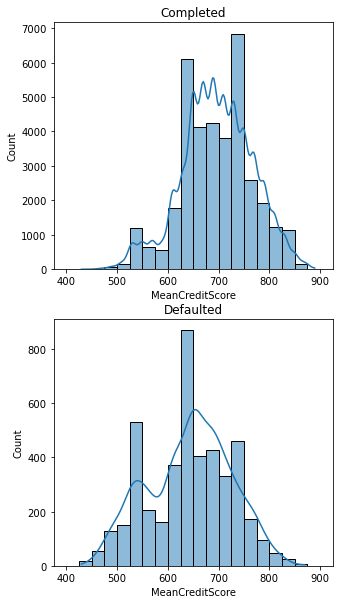

In [50]:
plt.figure(figsize = [5,10])
bins = np.arange(400,901,25)
plt.subplot(2,1,1)
sns.histplot(data = loans[loans['LoanStatus'] == 'Completed'], x = 'MeanCreditScore', bins = bins, kde = True)
plt.title('Completed')
plt.subplot(2,1,2)
sns.histplot(data = loans[loans['LoanStatus'] == 'Defaulted'], x = 'MeanCreditScore', bins = bins, kde = True);
plt.title('Defaulted');


In [54]:
sns.errorbar(data = loans, y = 'MeanCreditScore', x = 'LoanStatus')

AttributeError: module 'seaborn' has no attribute 'errorbar'

From the above graphs, we can notice that completed loans tend to have a higher credit score.

## Multivariate Exploration

In [52]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41057 entries, 0 to 113935
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Term              41057 non-null  category
 1   LoanStatus        41057 non-null  object  
 2   BorrowerRate      41057 non-null  float64 
 3   IncomeRange       41057 non-null  category
 4   IncomeVerifiable  41057 non-null  int32   
 5   MeanCreditScore   41057 non-null  float64 
dtypes: category(2), float64(2), int32(1), object(1)
memory usage: 2.7+ MB


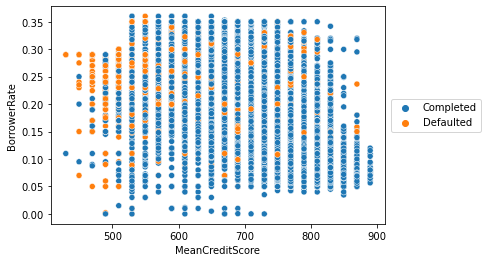

In [53]:
sns.scatterplot(data = loans, x = 'MeanCreditScore', y = 'BorrowerRate', hue = 'LoanStatus');
plt.legend(loc = 5, bbox_to_anchor = (1.3,0.5))

From the scatter plot, we can see that rate and credit score area unrelated. However, confirming an earlier observation, defaulted loans seem to have a lower credit score.